In [20]:
#Question 1

from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA

# Load the .arff file
data = arff.loadarff('mnist_784.arff')  
df = pd.DataFrame(data[0])

# Extract data and target columns
mnist_data = df.drop(columns='class')
mnist_target = df['class']

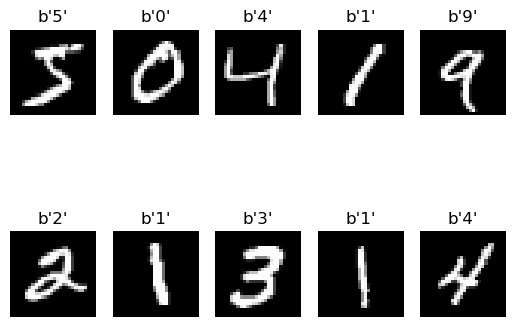

In [9]:
# Display the first 10 digits
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.array(mnist_data.iloc[i]).reshape(28, 28), cmap=plt.cm.gray)
    plt.title(str(mnist_target[i]))
    plt.axis('off')

plt.show()

In [10]:
# Perform PCA to retrieve the 1st and 2nd principal components
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_data)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratios for 1st and 2nd Principal Components:")
print(explained_variance_ratio)

Explained Variance Ratios for 1st and 2nd Principal Components:
[0.09746116 0.07155444]


/var/folders/f_/h6sfm66d0tlgh99y_vwz7ty80000gn/T/ipykernel_2176/3469783748.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_target.astype(int), cmap=plt.cm.get_cmap('jet', 10))


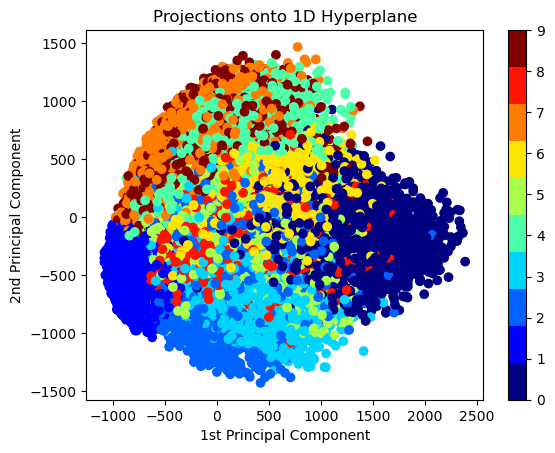

In [11]:
# Plot the projections onto a 1D hyperplane
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_target.astype(int), cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Projections onto 1D Hyperplane')
plt.colorbar()
plt.show()

In [12]:
# Use Incremental PCA to reduce dimensionality
n_components = 154  
ipca = IncrementalPCA(n_components=n_components)
mnist_reduced = ipca.fit_transform(mnist_data)

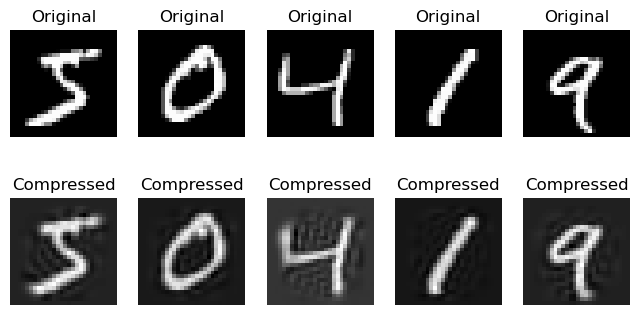

In [13]:
# Display original and compressed digits
plt.figure(figsize=(8, 4))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.array(mnist_data.iloc[i]).reshape(28, 28), cmap=plt.cm.gray)
    plt.title("Original")
    plt.axis('off')

    plt.subplot(2, 5, i + 6)
    plt.imshow(np.array(ipca.inverse_transform(mnist_reduced[i])).reshape(28, 28), cmap=plt.cm.gray)
    plt.title("Compressed")
    plt.axis('off')

plt.show()

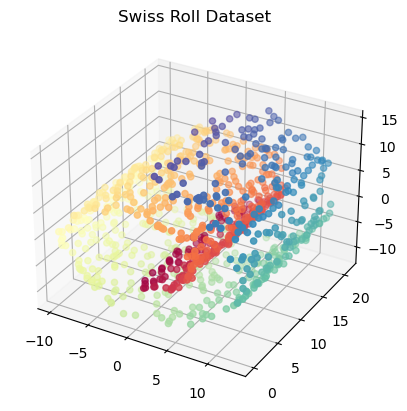

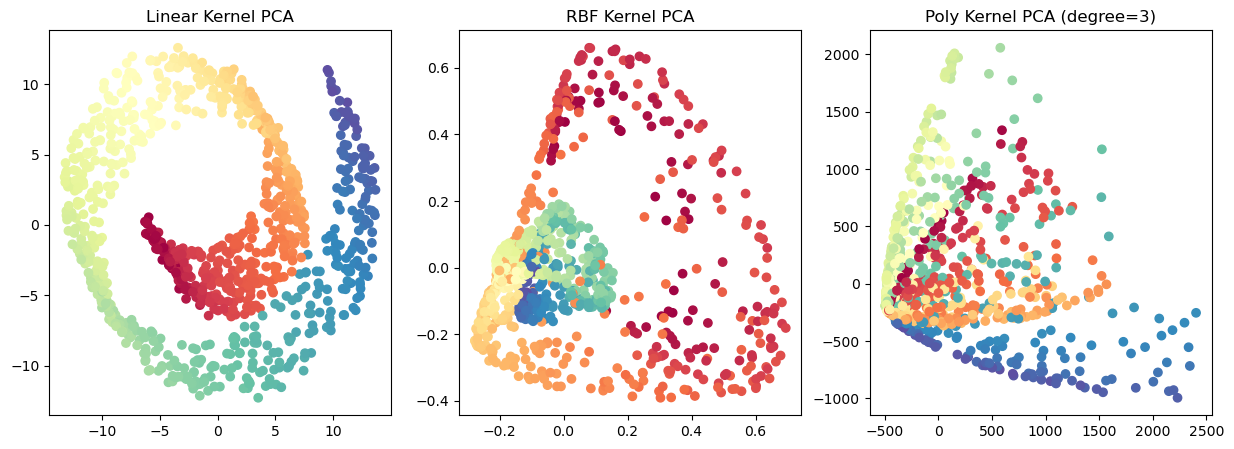

In [19]:
#Question 2

from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Generate Swiss Roll Dataset
X, y = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

# Step 2: Plot the Swiss Roll Dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Spectral)
ax.set_title('Swiss Roll Dataset')
plt.show()

# Step 3: Apply Kernel PCA with Different Kernels
# Linear Kernel PCA
kpca_linear = KernelPCA(kernel="linear")
X_kpca_linear = kpca_linear.fit_transform(X)

# RBF Kernel PCA
kpca_rbf = KernelPCA(kernel="rbf", gamma=0.04)
X_kpca_rbf = kpca_rbf.fit_transform(X)

# Poly Kernel PCA with a higher degree
kpca_poly = KernelPCA(kernel="poly", degree=3)
X_kpca_poly = kpca_poly.fit_transform(X)

# Step 4: Plot the kPCA Results
plt.figure(figsize=(15, 5))

# Linear Kernel PCA
plt.subplot(131)
plt.scatter(X_kpca_linear[:, 0], X_kpca_linear[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Linear Kernel PCA')

# RBF Kernel PCA
plt.subplot(132)
plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('RBF Kernel PCA')

# Poly Kernel PCA
plt.subplot(133)
plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Poly Kernel PCA (degree=3)')

plt.show()

